# Lab 5

- Do all features provide discrimination power between signal and background?
- Are there correlations among these features?
- Compute expected discovery sensitivity by normalizing each sample appropriately.
- Develop a plan to optimize the discovery sensitivity by applying selections to these features.

Pickle files: training sample and normalization

HDF5 files: pseduo-experiments

In [2]:
import pickle

# open the file of interest, and use pickle loading
infile = open("qcd_100000_pt_1000_1200.pkl",'rb')
data = pickle.load(infile)

# list all keys of the files
data.keys()

# len = 100,000

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

# Background
Goal: create simple 'analysis' optimizing the selection of signal while minimizing background. Find cuts that reduce the intrinsic backgrounds while preserving most of the signal (maximize SNR) in given highdimensional data.

Looking for standard model Higgs boson in pp collisions at √s = 13 TeV. The Higgs bosons are produced with large transverse momentum (pT) and decaying to a bottom quark-antiquark pair. With simulated set of LHC events:
- signal: Higgs decay to bb, forming jets
- background: generic QCD processes resulting in jets

Mass of Higgs boson $m_h = 125.09\pm 0.3$ GeV. This means we need to collide 1 billion protons to produce a Higgs. At 13 TeV, the total cross section for pp → h production is closer to 40 pb, but this estimate is not bad. Sensitivity: assuming Higgs boson exists, what kind of probability would I expect to record? Want high sensitivity so as to see something above signal.

<!--
[Generated data source](https://github.com/AlexSchuy/qsvm_jet_tagging/blob/master/qsvm_jet_tagging/generation/generate_samples.py)

[General info](https://arxiv.org/pdf/1709.04533.pdf)

[Subjet structure](https://arxiv.org/abs/1201.0008)

[More subjet](https://indico.cern.ch/event/68643/contributions/1233452/attachments/1025968/1460901/zenz_seth.pdf)

[Examples](https://atlas.web.cern.ch/Atlas/GROUPS/PHYSICS/PAPERS/PERF-2017-04/#tables)

http://fastjet.fr/repo/doxygen-3.0.0/annotated.html
-->

General terms:
- Pseudorapidity η is a geometric quantity(equal to 1 when perpendicular to z-axis). It is a function of polar angle θ that goes from inf to −inf as θ goes from 0 to π. Azimuthal angle ϕ goes around the beam. 
- A boosted object refers to a particle that travels at high speed.
- N-subjettiness is a jet shape that aims to discriminate jets according to the number N of subjets they are made of

<!--
Standard model particles:
<img src="./images/standard_model.jpg" width="600"/>
-->

## Jet

Group of particles that travel in the same direction. Easiest to define with a cone of $R = \sqrt{(\Delta\eta)^2 + (\Delta\phi)^2}$ around a particle and include particles in cone as a jet. After jets are found, multiple purpose; one of which relies on jet’s 4-momentum, defined as the sum of the 4-momenta of all the particles in the jet. Used to approximate the momentum of a primordial parton. Now we want to see jet substructure; with increased angular resolution one can approach a complete classification of all the particles in the jet, rather than
just the aggregate energy in a region. Also for helpful for general particle searches.

Iterative clustering:
1. Calculate the pairwise distance dij between every pair of objects.
2. Merge the two closest particles.
3. Repeat until no two particles are closer than some given R.
Result in n jets of size R.

kT algorithm: distance $d_{ij} = min(p^2_{Ti} + p^2_{Tj}) R^2_{ij}/R^2$

## Exploring the data
Each sample contains 14 features(only high level jet information): 
‘pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1', 't2', 't3', 't21', 't32', 'KtDeltaR'

#### Transverse momentum
$pT=(px,py)$ should also vary depending on the mass which can be distinguished

#### Pseudorapidity
May not contain discrimination power but shows correlation with larger transverse momentum perpendicular to z-axis $(\eta = \ln cot \frac{\theta}{2})$ function of theta and equal to 0 when perpendicular to z-axis

#### Phi
$(\phi=tan^{-1}\frac{px}{py})$ dependent on x,y momentum so determinable

#### Mass
Most particle masses vary by enough GeV to distinguish them apart; the Higgs boson having a mass closest to the Muon but still varies by a few Gev. May not show correlation given the quantity of particles.

#### Correlation function:
These two variables can be seen as a form of density using two- or three-particle sets as reference. 
>ee2: 2-point correlation function; varies by jet, sum of momentum changes over total momentum squared

>ee3: 3-point correlation function; measures the probability of finding a certain value of the density at one point given the density at another
    <!--http://www.personal.psu.edu/duj13/dissertation/djeong_diss_appK.pdf-->
    
>d2: $\frac{ee3}{(ee2)^2}$ ratio of correlation function could distinguish jet characteristics

#### Angularity
Has direct correlation with mass in addition to particle energy but provides less discrimintation power given the density of particles with similar angularity.
>$=\sum\frac{E_p (1-cos\theta^3)}{m sin^2\theta}$

#### Proportion
$tn = \sum\frac{pT \Delta R}{pT \Delta R}$; subjets n divided by complete jet constituents 
>t1: subjet proportion with 1 subjet cluster; depends on momentum so distinguishable, delta_R < 1.0

>t2: subjet proportion with 2 subjets cluster

>t3: subjet proportion with 3 subjets cluster

>t21: t2/t1; 

>t32: t3/t2; 
    <!--Mandelstram var: t-channel where t = (-2 p1 * p3) or (-2 p2 * p4)-->

#### KtDeltaR
Delta-R of two subjets within large-R jet using kT algorithm; could be dicriminating depending on decay and energy of particle type

In summary:

|Feature|Description|
|-|-|
|Transverse momentum|$pT=(px,py)$ should vary depending on the mass which can be distinguished|
|Pseudorapiditiy $\eta$|$(\eta = \ln cot \frac{\theta}{2})$ function of theta and equal to 0 when perpendicular to z-axis; not as distinguihsable given jets grouped on theta|
|Phi $\phi$|$(\phi=tan^{-1}\frac{px}{py})$ dependent on x,y momentum so determinable|
|Mass|most particle masses vary by enough GeV to distinguish them apart; the Higgs boson having a mass closest to the Muon.
|ee2|2-point correlation function; varies by jet, sum of momentum changes over total momentum squared
|ee3|3-point correlation function; measures the probability of finding a certain value of the density at one point given the density at another
|d2|ee3/(ee2^2) ratio of correlation function could distinguish jet characteristics
|angularity|sum_theta/mass
|t1|subjet proportion with 1 subjet; depends on momentum so distinguishable, delta_R < 1.0
|t2|subjet proportion with 2 subjets
|t3|subjet proportion with 3 subjets
|t21|t2/t1
|t32|t3/t2
|KtDeltaR|delta-R of two subjets within large-R jet using kT algorithm; could be discriminating depending on decay and energy of particle type

272.01088105661836 0.10248540029191969 0.0034923093358888305
139.7944080424717 0.03543016405753004 0.00028826586946748787
245.4131462450914 0.09907951540140385 0.002562697082927392
89.97591625467423 0.01794968235476168 7.743652409502384e-05
85.89395606420216 0.018514640498646803 7.198491157951608e-05
298.82680391098984 0.10625993891283972 0.0030296204259177184
120.11684917359369 0.04756753448689699 0.00032483444795465766
144.69776811306357 0.0350447103340044 0.0003090363457548267
99.67094594080851 0.02158572947856144 7.044496544754368e-05
246.64401978773606 0.13570880383070716 0.0032285851749762184


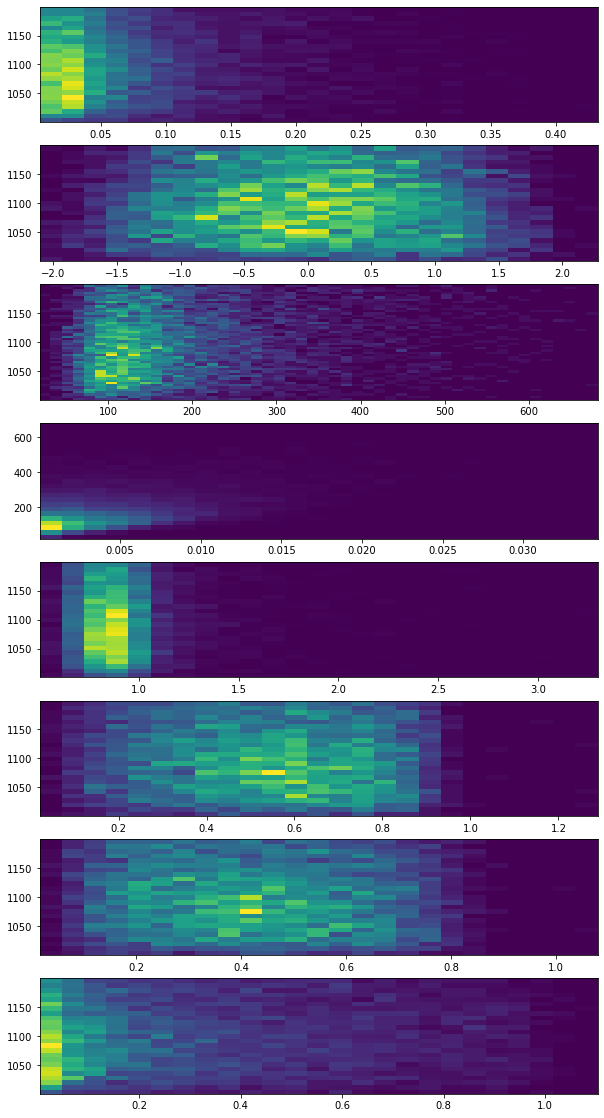

In [3]:
# Plotting the data
    
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats, signal

fig1, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8) = plt.subplots(8,1,figsize=(10,20))

# Print variables of the first 10 jets
for i in range(10):
    print(data['mass'][i], data['ee2'][i], data['ee3'][i])

# d2 > ee3 > ee2
ax1.hist2d(data['ee2'][0::10], data['pt'][0::10], bins=25)
# ax1.plot(data['ee3'][0::1000])

ax2.hist2d(data['eta'][0::10], data['pt'][0::10], bins=25)

ax3.hist2d(data['mass'][0::10], data['pt'][0::10], bins=50)

ax4.hist2d(data['angularity'][0::10], data['mass'][0::10], bins=25)

ax5.hist2d(data['t1'][0::10], data['pt'][0::10], bins=25)
ax6.hist2d(data['t2'][0::10], data['pt'][0::10], bins=25)
ax7.hist2d(data['t3'][0::10], data['pt'][0::10], bins=25)

ax8.hist2d(data['KtDeltaR'][0::10], data['pt'][0::10], bins=25)

plt.show()

[0.75687477 0.09240529 0.61737891 ... 0.45832982 0.58392444 0.61558877]


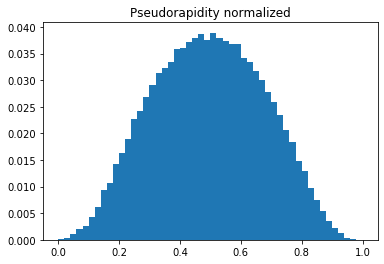

In [13]:
temp = np.max(data['eta']) - np.min(data['eta'])
x = [temp] * 100000
eta_norm = signal.normalize(data['eta']-np.min(data['eta']), x)
print(eta_norm[0])
weights = np.ones_like(eta_norm[0])/float(len(eta_norm[0]))
# plt.hist(eta_norm[0], bins=50, density=True)
plt.hist(eta_norm[0], weights=weights, bins=50)
plt.title('Pseudorapidity normalized')
plt.show()

We can use p-scores to select our features. We can also use $s/\sqrt{b}$ as a measure of discovery sensitivity where s is the expected signal and b is the expected background, which is the simulated data. We can then get p-scores when s = 0 and convert to a sigma given a cutoff to the p-value.